<a href="https://colab.research.google.com/github/gawronn91/Fraud_detection/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

## 1.1 Explaining the notebook details

The first step of the project was understanding the data and feature engineering made in the [EDA](https://drive.google.com/file/d/1RBTFvEfnKHWFx1GemFA_fc4OLALIjVRN/view?usp=share_link) document<br>
After that Cross Validation method was found in the [CV](https://drive.google.com/file/d/10iux2mGq0aV49RCueW32Jsa4Q0PtwGQT/view?usp=share_link) notebook.<br>
The best features were selected in the document named [FS](https://drive.google.com/file/d/1vPB3qOO_ZgsDNJkbP3gkobQT61IoH99r/view?usp=share_link).<br>
All those operations had basically one main target - to make the model more efficient in fraud detection.<br>
And this is the notebook, where we will check the efficiency of the prepared model.

## 1.2 Importing Necessary Libraries

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np

# System
import os, gc

# Math
import math

#DateTime
from datetime import datetime
from datetime import timedelta

# Data Visualization
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec # to do the grid of plots
import seaborn as sns

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, KFold, GroupKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, precision_score, recall_score, fbeta_score, confusion_matrix, plot_confusion_matrix, precision_recall_curve, accuracy_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb

# Dimension reduction
from sklearn.decomposition import PCA

#Feature selection
from boruta import BorutaPy

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set_theme(style="white")

# 2. Data Loading

## 2.1 Train and Test datasets

In [ ]:
train_df = pd.read_pickle('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/train_nan(-999).pkl')
test_df = pd.read_pickle('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/test_nan(-999).pkl')

In [ ]:
print('Shape of Train dataset: ', train_df.shape)
print('Shape of Test dataset: ', test_df.shape)

Shape of Train dataset:  (590540, 525)
Shape of Test dataset:  (506691, 524)


## 2.2 Additional documents generated in different notebooks

### 2.2.1 Lists of chosen columns from CV file 

In [ ]:
void_cols_250 = np.genfromtxt('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/Project_Final/best_250_features.csv', delimiter=',',names=True,dtype=None, encoding=None)
void_cols_306 = np.genfromtxt('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/Project_Final/best_306_features.csv', delimiter=',',names=True,dtype=None, encoding=None)
void_cols_370 = np.genfromtxt('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/Project_Final/best_370_features.csv', delimiter=',',names=True,dtype=None, encoding=None)

In [ ]:
cols_250 = [void_cols_250[i]['D1'] for i in range(len(void_cols_250))]
cols_306 = [void_cols_306[i]['D1'] for i in range(len(void_cols_306))]
cols_370 = [void_cols_370[i]['D1'] for i in range(len(void_cols_370))]

### 2.2.2 Results from previous runs of current document

Due to long time needed for training the model, I used results gathered from previous runs of this document. <br>
It will allow to interfere with the notebook without necesity of waiting for model to be trained. <br>
On my local machine it takes more than 2000 minutes. 

In [ ]:
void_y_train = np.genfromtxt('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/Project_Final/y_pred250.csv', delimiter=',',names=True,dtype=None, encoding=None)

In [ ]:
# Actual target variable ('isFraud') from train dataset
y_train = [void_y_train[i][0] for i in range(len(void_y_train))]

In [ ]:
void_train_preds250 = np.genfromtxt('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/Project_Final/train_preds250.csv', delimiter=',',names=True,dtype=None, encoding=None)
void_preds250 = np.genfromtxt('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/Project_Final/preds250.csv', delimiter=',',names=True,dtype=None, encoding=None)

In [ ]:
# Calculated target variable ('isFraud') for train dataset as a regression - values between 0 and 1 
train_preds250 = [void_train_preds250[i][0] for i in range(len(void_train_preds250))]

# Calculated target variable ('isFraud') for test dataset as a regression - values between 0 and 1 
preds250 = [void_preds250[i][0] for i in range(len(void_preds250))]

In [ ]:
void_train_preds306 = np.genfromtxt('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/Project_Final/train_preds306.csv', delimiter=',',names=True,dtype=None, encoding=None)
void_preds306 = np.genfromtxt('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/Project_Final/preds306.csv', delimiter=',',names=True,dtype=None, encoding=None)

In [ ]:
# Calculated target variable ('isFraud') for train dataset as a regression - values between 0 and 1 
train_preds306 = [void_train_preds250[i][0] for i in range(len(void_train_preds306))]

# Calculated target variable ('isFraud') for test dataset as a regression - values between 0 and 1 
preds306 = [void_preds306[i][0] for i in range(len(void_preds306))]

In [ ]:
void_train_preds370 = np.genfromtxt('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/Project_Final/train_preds370.csv', delimiter=',',names=True,dtype=None, encoding=None)
void_preds370 = np.genfromtxt('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/2tygodnie_do_konca/Project_Final/preds370.csv', delimiter=',',names=True,dtype=None, encoding=None)

In [ ]:
# Calculated target variable ('isFraud') for train dataset as a regression - values between 0 and 1 
train_preds370 = [void_train_preds370[i][0] for i in range(len(void_train_preds250))]

# Calculated target variable ('isFraud') for test dataset as a regression - values between 0 and 1
preds370 = [void_preds370[i][0] for i in range(len(void_preds370))]

### Submission file for Kaggle Competition

In [ ]:
sample_submission = pd.read_csv('/Users/gawro/OneDrive/Pulpit/PJATK/Projekt_wlasny/sample_submission.csv', index_col='TransactionID')

# 3. XGBoost model

## 3.1 Introduction

As a base model, I have chosen XGBoost.<br>
XGBoost (eXtreme Gradient Boosting) is an advanced implementation of a gradient boosting algorithm. The main advantages are:
* Big efficiency with tabular data
* Boosting algorithms are generally good at dealing with imbalanced data, so there is no need to use additional algorithms, like SMOTE
* XGBoost has regularization, therefore it also helps to reduce overfitting

In this notebook, I will use 3 datasets with chosen respectively 250, 306, and 370 features chosen in the FS document.<br>
Then I will train 3 independent models using Group k-fold Cross Validation, chosen in CV document.<br>
Then I will compare the results with each other.

## 3.2 Model parameters

To find fraud transactions among datasets, I will use the XGB model with the parameters as below:

In [ ]:
xgb = xgb.XGBClassifier(
            n_estimators=5000,
            max_depth=12,
            learning_rate=0.02,
            subsample=0.8,
            colsample_bytree=0.4,
            missing=-1,
            eval_metric='auc',
            # USE CPU
            nthread=4,
            tree_method='hist'
            # USE GPU
            #tree_method='gpu_hist' 
        )

## 3.3 Dataset with 250 columns

In [ ]:
rm_cols = ['TransactionDT', 'TransactionDT_old']

y_train = train_df['isFraud'].copy()
cols = [col for col in cols_250 if col not in rm_cols]

In [ ]:
train_preds250 = np.zeros(len(train_df))
preds250 = np.zeros(len(test_df))

skf = GroupKFold(n_splits=6)
for i, (idxT, idxV) in enumerate( skf.split(train_df, y_train, groups=train_df['TransactionDTMonth']) ):
    month = train_df.iloc[idxV]['TransactionDTMonth'].iloc[0]
    print('Fold',i,'withholding month',month)
    print(' rows of train =',len(idxT),'rows of holdout =',len(idxV))
    xgb250 = xgb.XGBClassifier(
            n_estimators=5000,
            max_depth=12,
            learning_rate=0.02,
            subsample=0.8,
            colsample_bytree=0.4,
            missing=-1,
            eval_metric='auc',
            # USE CPU
            nthread=4,
            tree_method='hist'
            # USE GPU
            #tree_method='gpu_hist' 
        )        
    xgb250.fit(train_df[cols].iloc[idxT], y_train.iloc[idxT], 
                eval_set=[(train_df[cols].iloc[idxV],y_train.iloc[idxV])],
                verbose=100, early_stopping_rounds=200)
    
    train_preds250[idxV] += xgb250.predict_proba(train_df[cols].iloc[idxV])[:,1]
    preds250 += xgb250.predict_proba(test_df[cols])[:,1]/skf.n_splits
    x=gc.collect()
print('\n')
print ('ROC AUC score=',roc_auc_score(y_train,train_preds250))

Fold 0 withholding month 12
 rows of train = 456201 rows of holdout = 134339
[0]	validation_0-auc:0.76755
[100]	validation_0-auc:0.87111
[200]	validation_0-auc:0.89030
[300]	validation_0-auc:0.89949
[400]	validation_0-auc:0.90431
[500]	validation_0-auc:0.90707
[600]	validation_0-auc:0.90735
[700]	validation_0-auc:0.90704
[800]	validation_0-auc:0.90738
[900]	validation_0-auc:0.90671
[1000]	validation_0-auc:0.90671
Fold 1 withholding month 3
 rows of train = 488572 rows of holdout = 101968
[0]	validation_0-auc:0.82702
[100]	validation_0-auc:0.90130
[200]	validation_0-auc:0.92769
[300]	validation_0-auc:0.94086
[400]	validation_0-auc:0.94454
[500]	validation_0-auc:0.94537
[600]	validation_0-auc:0.94540
[700]	validation_0-auc:0.94523
[774]	validation_0-auc:0.94541
Fold 2 withholding month 1
 rows of train = 498030 rows of holdout = 92510
[0]	validation_0-auc:0.83613
[100]	validation_0-auc:0.90212
[200]	validation_0-auc:0.92775
[300]	validation_0-auc:0.94071
[400]	validation_0-auc:0.94507
[5

## 3.4 Dataset with 306 columns

In [ ]:
cols = [col for col in cols_306 if col not in rm_cols]

In [ ]:
train_preds306 = np.zeros(len(train_df))
preds306 = np.zeros(len(test_df))

skf = GroupKFold(n_splits=6)
for i, (idxT, idxV) in enumerate( skf.split(train_df, y_train, groups=train_df['TransactionDTMonth']) ):
    month = train_df.iloc[idxV]['TransactionDTMonth'].iloc[0]
    print('Fold',i,'withholding month',month)
    print(' rows of train =',len(idxT),'rows of holdout =',len(idxV))
    xgb306 = xgb.XGBClassifier(
            n_estimators=5000,
            max_depth=12,
            learning_rate=0.02,
            subsample=0.8,
            colsample_bytree=0.4,
            missing=-1,
            eval_metric='auc',
            # USE CPU
            nthread=4,
            tree_method='hist'
            # USE GPU
            #tree_method='gpu_hist' 
        )        
    xgb306.fit(train_df[cols].iloc[idxT], y_train.iloc[idxT], 
                eval_set=[(train_df[cols].iloc[idxV],y_train.iloc[idxV])],
                verbose=100, early_stopping_rounds=200)
    
    train_preds306[idxV] += xgb306.predict_proba(train_df[cols].iloc[idxV])[:,1]
    preds306 += xgb306.predict_proba(test_df[cols])[:,1]/skf.n_splits
    x=gc.collect()
print('\n')
print ('ROC AUC score=',roc_auc_score(y_train,train_preds306))

Fold 0 withholding month 12
 rows of train = 456201 rows of holdout = 134339
[0]	validation_0-auc:0.81854
[100]	validation_0-auc:0.86720
[200]	validation_0-auc:0.88749
[300]	validation_0-auc:0.89863
[400]	validation_0-auc:0.90282
[500]	validation_0-auc:0.90468
[600]	validation_0-auc:0.90589
[700]	validation_0-auc:0.90544
[800]	validation_0-auc:0.90609
[900]	validation_0-auc:0.90576
[978]	validation_0-auc:0.90588
Fold 1 withholding month 3
 rows of train = 488572 rows of holdout = 101968
[0]	validation_0-auc:0.83515
[100]	validation_0-auc:0.90004
[200]	validation_0-auc:0.92624
[300]	validation_0-auc:0.93978
[400]	validation_0-auc:0.94371
[500]	validation_0-auc:0.94500
[600]	validation_0-auc:0.94539
[700]	validation_0-auc:0.94545
[800]	validation_0-auc:0.94531
[845]	validation_0-auc:0.94519
Fold 2 withholding month 1
 rows of train = 498030 rows of holdout = 92510
[0]	validation_0-auc:0.83989
[100]	validation_0-auc:0.90241
[200]	validation_0-auc:0.92678
[300]	validation_0-auc:0.93932
[40

## 3.5 Dataset with 370 columns

Due to long calculating time, I was forced to use only results with 250 and 306 features.

In [ ]:
# cols = [col for col in cols_370 if col not in rm_cols]

In [ ]:
# train_preds370 = np.zeros(len(train_df))
# preds370 = np.zeros(len(test_df))

# skf = GroupKFold(n_splits=6)
# for i, (idxT, idxV) in enumerate( skf.split(train_df, y_train, groups=train_df['TransactionDTMonth']) ):
#     month = train_df.iloc[idxV]['TransactionDTMonth'].iloc[0]
#     print('Fold',i,'withholding month',month)
#     print(' rows of train =',len(idxT),'rows of holdout =',len(idxV))
#     xgb370 = xgb.XGBClassifier(
#             n_estimators=5000,
#             max_depth=12,
#             learning_rate=0.02,
#             subsample=0.8,
#             colsample_bytree=0.4,
#             missing=-1,
#             eval_metric='auc',
#             # USE CPU
#             nthread=4,
#             tree_method='hist'
#             # USE GPU
#             #tree_method='gpu_hist' 
#         )        
#     xgb370.fit(train_df[cols].iloc[idxT], y_train.iloc[idxT], 
#                 eval_set=[(train_df[cols].iloc[idxV],y_train.iloc[idxV])],
#                 verbose=100, early_stopping_rounds=200)
    
#     train_preds370[idxV] += xgb370.predict_proba(train_df[cols].iloc[idxV])[:,1]
#     xgb370 += xgb370.predict_proba(test_df[cols])[:,1]/skf.n_splits
#     x=gc.collect()
# print('\n')
# print ('ROC AUC score=',roc_auc_score(y_train,train_preds370))

# 4 Analysis of the results

In [ ]:
def print_results(true_value, pred):
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))
    print('#'*20)

## 4.1 Dataset with 250 columns

In [ ]:
y_pred250 = []
for i in range(10):
   y_pred250.append(np.where(train_preds250<(i+1)/10, 0, 1))

In [ ]:
for i in range(10):
    print('Iteration for Threshold =', ((i+1)/10))
    print(confusion_matrix(y_train, y_pred250[i]), end='\n')
    print('#'*20)

Iteration for Threshold = 0.1
[[561546   8331]
 [  7576  13087]]
####################
Iteration for Threshold = 0.2
[[566168   3709]
 [  9277  11386]]
####################
Iteration for Threshold = 0.3
[[567647   2230]
 [ 10217  10446]]
####################
Iteration for Threshold = 0.4
[[568486   1391]
 [ 10995   9668]]
####################
Iteration for Threshold = 0.5
[[568895    982]
 [ 11723   8940]]
####################
Iteration for Threshold = 0.6
[[569146    731]
 [ 12458   8205]]
####################
Iteration for Threshold = 0.7
[[569341    536]
 [ 13202   7461]]
####################
Iteration for Threshold = 0.8
[[569501    376]
 [ 14171   6492]]
####################
Iteration for Threshold = 0.9
[[569688    189]
 [ 15616   5047]]
####################
Iteration for Threshold = 1.0
[[569877      0]
 [ 20663      0]]
####################


In [ ]:
for i in range(10):
    print('Iteration for Threshold =', ((i+1)/10))
    print_results(y_train, y_pred250[i])

Iteration for Threshold = 0.1
accuracy: 0.973063636671521
precision: 0.6110281071995518
recall: 0.6333543047960122
f2: 0.6287594888056116
####################
Iteration for Threshold = 0.2
accuracy: 0.978009956988519
precision: 0.7542894998343822
recall: 0.5510332478342932
f2: 0.5824219669145856
####################
Iteration for Threshold = 0.3
accuracy: 0.9789226809360924
precision: 0.8240769958977595
recall: 0.5055413057155301
f2: 0.54789778449144
####################
Iteration for Threshold = 0.4
accuracy: 0.9790259762251499
precision: 0.8742200922325708
recall: 0.467889464259788
f2: 0.5158412566294245
####################
Iteration for Threshold = 0.5
accuracy: 0.9784857926643411
precision: 0.9010280185446482
recall: 0.4326574069592992
f2: 0.48285695767710163
####################
Iteration for Threshold = 0.6
accuracy: 0.9776662038134589
precision: 0.9181960608773501
recall: 0.39708657987707496
f2: 0.44792985980696165
####################
Iteration for Threshold = 0.7
accuracy: 0.

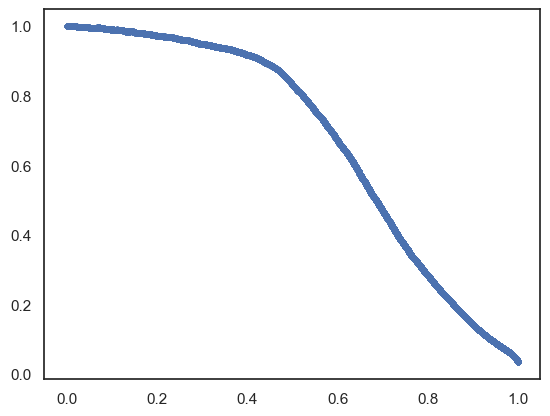

In [ ]:
precision250, recall250, thresholds250 = precision_recall_curve(y_train, train_preds250)
plt.plot(recall250, precision250, marker='.', label='Logistic')

Saving the results:

In [ ]:
np.savetxt("y_train.csv", np.asarray(y_train), delimiter=",", fmt='%s')
np.savetxt("train_preds250.csv", np.asarray(train_preds250), delimiter=",", fmt='%s')
np.savetxt("preds250.csv", np.asarray(preds250), delimiter=",", fmt='%s')

Making the submission:

In [ ]:
sample_submission['isFraud'] = preds250
sample_submission.to_csv('sample_submission.csv')

Kaggle result: 0.942611

## 4.2 Dataset with 306 columns

In [ ]:
y_pred306 = []
for i in range(10):
   y_pred306.append(np.where(train_preds306<(i+1)/10, 0, 1))

In [ ]:
for i in range(10):
    print('Iteration for Threshold =', ((i+1)/10))
    print(confusion_matrix(y_train, y_pred306[i]), end='\n')
    print('#'*20)

Iteration for Threshold = 0.1
[[562187   7690]
 [  7733  12930]]
####################
Iteration for Threshold = 0.2
[[566531   3346]
 [  9280  11383]]
####################
Iteration for Threshold = 0.3
[[567955   1922]
 [ 10213  10450]]
####################
Iteration for Threshold = 0.4
[[568608   1269]
 [ 10954   9709]]
####################
Iteration for Threshold = 0.5
[[568927    950]
 [ 11652   9011]]
####################
Iteration for Threshold = 0.6
[[569160    717]
 [ 12292   8371]]
####################
Iteration for Threshold = 0.7
[[569335    542]
 [ 13089   7574]]
####################
Iteration for Threshold = 0.8
[[569479    398]
 [ 13955   6708]]
####################
Iteration for Threshold = 0.9
[[569668    209]
 [ 15422   5241]]
####################
Iteration for Threshold = 1.0
[[569877      0]
 [ 20663      0]]
####################


In [ ]:
for i in range(10):
    print('Iteration for Threshold =', ((i+1)/10))
    print_results(y_train, y_pred306[i])

Iteration for Threshold = 0.1
accuracy: 0.9738832255224033
precision: 0.6270611057225994
recall: 0.6257561825485167
f2: 0.6260167325122008
####################
Iteration for Threshold = 0.2
accuracy: 0.9786195685304975
precision: 0.7728291126349379
recall: 0.550888060784978
f2: 0.5844569269159282
####################
Iteration for Threshold = 0.3
accuracy: 0.9794510109391404
precision: 0.8446492078887812
recall: 0.5057348884479504
f2: 0.5498610877252061
####################
Iteration for Threshold = 0.4
accuracy: 0.9793019947844346
precision: 0.8844051739843323
recall: 0.4698736872670958
f2: 0.5184769838726904
####################
Iteration for Threshold = 0.5
accuracy: 0.9786602092999628
precision: 0.9046280493926313
recall: 0.436093500459759
f2: 0.4864867783140596
####################
Iteration for Threshold = 0.6
accuracy: 0.9779710095844482
precision: 0.9211047535211268
recall: 0.4051202632725161
f2: 0.4562350119904077
####################
Iteration for Threshold = 0.7
accuracy: 0.

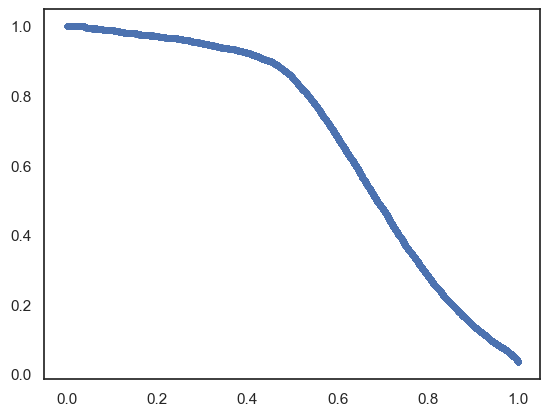

In [ ]:
precision306, recall306, thresholds306 = precision_recall_curve(y_train, train_preds306)
plt.plot(recall306, precision306, marker='.', label='Logistic')

Saving the results:

In [ ]:
np.savetxt("train_preds306.csv", np.asarray(train_preds306), delimiter=",", fmt='%s')
np.savetxt("preds306.csv", np.asarray(preds306), delimiter=",", fmt='%s')

Making the submission:

In [ ]:
sample_submission['isFraud'] = preds306
sample_submission.to_csv('sample_submission.csv')

Kaggle result: 0.942958

## 4.3 Dataset with 370 columns

In [ ]:
# y_pred370 = []
# for i in range(10):
#    y_pred306.append(np.where(train_preds306<(i+1)/10, 0, 1))

In [ ]:
# for i in range(10):
#     print('iteration for Threshold =', ((i+1)/10))
#     print(confusion_matrix(y_train, y_pred370[i]), end='\n')
#     print('#'*20)

In [ ]:
# for i in range(10):
#     print_results(y_train, y_pred370[i])

In [ ]:
# precision370, recall370, thresholds370 = precision_recall_curve(y_train, train_preds370)
# plt.plot(recall370, precision370, marker='.', label='Logistic')

Saving the results:

In [ ]:
# np.savetxt("train_preds370.csv", np.asarray(train_preds370), delimiter=",", fmt='%s')
# np.savetxt("preds370.csv", np.asarray(preds370), delimiter=",", fmt='%s')

Making the submission:

In [ ]:
# sample_submission['isFraud'] = preds370
# sample_submission.to_csv('sample_submission.csv')

## 4.4 Final analysis

We can see, that model is rather better with precision than with recall with its precision peak at over 96%. <br>
Nevertheless, the respective recall value is around 25%, which is rather small. <br>
Using a model settled to those values would be very efficient in being precise with detecting frauds, finding over 5 000 fraud transactions with only 189 normal transactions considered as fraud attempts. <br>
<br>
But this approach is associated with a large number of undetected frauds, which is over 15 000!<br>
If our target is to find as many fraud attempts, as possible, this model will not fit well.<br>
<br>
We could lower that number by using different thresholds, but it will cause increasing ofType I Error observations.<br>
Iteration with the highest f2 score with a value of 0.58 returns 75% of precision and 55% of recall.<br>
On the other hand biggest accuracy (98%) is for another threshold with 87% of precision and 47% of recall.<br>
<br>
Generally model is much more efficient with high precision and low recall.

It gives one important conclusion that we need to play with thresholds, to get values, which best fit to business strategy for the used model.<br>
Of course, there is also a very big field of regulating the model, by using different hyperparameters.<br>
I will use this approach for future tuning of the model, but it takes much time due to long calculations.

Of course, there is a question, of how better the model can be. And the answer isn't so simple.<br>
Looking at the results and ROC AUC curve it is easy to say, that model isn't performing very well. <br>
<br>
But after a deeper look, we can see that the problem itself causes, that detecting all frauds is impossible.<br>
There are many frauds, which fit one of the patterns, mentioned in the EDA notebook. <br>
But on the other hand, new methods of fraud are discovered and it needs time for a model to detect a new pattern. <br>
<br>
Additionally, there are plenty of fraud attempts unable of being detected, such as simply using someone else's card for casual shopping. <br>
The algorithm just cannot know, that someone's card has been stolen or lost and then used in some local store. <br>
<br>
Nevertheless, by comparing results with different Kaggle submissions, I can say that model is performing really well.<br>
it was rather high on a leaderboard. Without applying many possible ways of upgrading the model.